# Lesson 7
### Written by Adithya Solai

# Web Scraping

In [25]:
import requests
from bs4 import BeautifulSoup

**Step 1: Request a connection to the website using the URL. Make sure you receive the HTTPS success code 200.**

In [26]:
# Get Per-Game season averages for all NBA players from the 2018-2019 season.
url = 'https://www.basketball-reference.com/leagues/NBA_2019_per_game.html'
r = requests.get(url)
print(r) # Make sure we get Response 200

<Response [200]>


**Step 2: Initialize a BeautifulSoup object with the root of the HTML tree.**

In [27]:
root = BeautifulSoup(r.content)
print(type(root)) # Make sure BeautifulSoup object initializes

<class 'bs4.BeautifulSoup'>


**Step 3: Using your BeautifulSoup object, use the `find()` function to scrape all HTML content under the tag you are looking for.**

In this case, the HTML tag we want to filter with is /t or "table".

**Note:** `find()` only gets all the HTML content under the FIRST occurence of the tag you requested. Use `find_all()` to get a Python list of all content under all occurences of that tag. Check out the BeautifulSoup documentation for more examples and tips (https://www.crummy.com/software/BeautifulSoup/bs4/doc/).

In [28]:
player_stats_table = root.find("table").prettify()
print(type(player_stats_table))

<class 'str'>


**Step 4:** Use Pandas' built-in HTML parser to convert the HTML table content into a DataFrame

In [29]:
import pandas as pd
import numpy as np

In [30]:
player_df = pd.read_html(player_stats_table)[0]
player_df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,528,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,...,.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
730,529,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,...,.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
731,530,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,...,.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
732,530,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,...,.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


# Data Visualization

## MatPlotLib
Full Documentation: https://matplotlib.org/stable/contents.html

In [31]:
import matplotlib.pyplot as plt

**Let's use the full Major League Baseball (MLB) dataset for these MatPlotLib examples.**

In [32]:
mlb = pd.read_csv("./datasets/baseball_full.csv")
mlb

,teamID,yearID,total_payroll,winning_pct,franchID,W,G
0,BAL,1990,9680084,47.204969,BAL,76,161
1,BOS,1990,20558333,54.320988,BOS,88,162
2,CAL,1990,21720000,49.382716,ANA,80,162
3,CHA,1990,9491500,58.024691,CHW,94,162
4,CLE,1990,14487000,47.530864,CLE,77,162
...,...,...,...,...,...,...,...
723,PIT,2014,77178000,54.320988,PIT,88,162
724,SDN,2014,75685700,47.530864,SDP,77,162
725,SFN,2014,20000000,54.320988,SFG,88,162
726,SLN,2014,120693000,55.555556,STL,90,162


### MatPlotLib Simple Scatter Plot

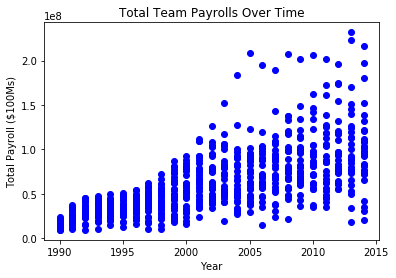

In [33]:
plt.scatter(x=mlb['yearID'], y=mlb['total_payroll'], c="blue")
plt.title("Total Team Payrolls Over Time")
plt.xlabel("Year")
plt.ylabel("Total Payroll ($100Ms)")
plt.show()

### MatPlotLib Scatter Plot w/ Lines & Annotated Points

**The previous plot above does not really let us get insight about individual teams...**

Let's change up our dataset a bit to plot individual teams on a scatter plot. We will find the mean `total_payroll` and `winning_pct` across all years for each team and plot those values.

In [34]:
# group by teamID, and calculate mean payroll and mean win_pct
mlb_teams = mlb[['franchID','total_payroll', 'winning_pct']].groupby(['franchID']).mean()

# change column names to reflect that these are now mean payroll and win_pct
mlb_teams.rename(columns = {'total_payroll':'mean_payroll', 'winning_pct':'mean_win_pct'}, inplace=True)

mlb_teams

,mean_payroll,mean_win_pct
franchID,,
ANA,7.423995e+07,51.797242
ARI,7.117501e+07,49.201162
ATL,7.242608e+07,56.950837
BAL,6.279722e+07,47.849851
BOS,9.463517e+07,53.909355
CHC,7.167308e+07,47.491008
CHW,6.621212e+07,51.789768
CIN,5.541069e+07,50.099769
CLE,5.456441e+07,51.241198


**Let's plot all teams with mean total payroll as the X-axis and mean winning pct as the Y-axis AND draw a line of best fit AND annotate each team's abbreviation next to its dot on the scatter plot:**

c:\Users\pratb\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\pratb\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\Users\pratb\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


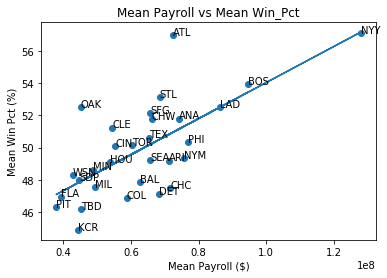

In [35]:
plt.scatter(x=mlb_teams['mean_payroll'],y=mlb_teams['mean_win_pct'])
plt.title("Mean Payroll vs Mean Win_Pct")
plt.xlabel("Mean Payroll ($)")
plt.ylabel("Mean Win Pct (%)")

# use plt.annotate to add the teamID labels to each point.
# Need to give exact x,y coords for annotate(), so we
# iterate through each dataframe using iterrows()
for key, row in mlb_teams.iterrows():
    plt.annotate(key, xy=(row['mean_payroll'], row['mean_win_pct']))

# define the linear regression line
x = mlb_teams['mean_payroll']
y = mlb_teams['mean_win_pct']

# m is slope and b is intercept of linear regression line
m, b = np.polyfit(x,y,1)

# x is still x, but y = mx + b
plt.plot(x, m*x + b)

plt.show()

### MatPlotLib Multi-Line Plot w/ a Pivot Table

**The plot above shows some interesting outlier teams that we should look deeper into...**

**NYY seems to pay a lot and win a lot and teams like ATL & OAK win a lot more than they should relative to their mean payroll as per the line of best fit.**

**Let's plot total payroll and winning_pct for these three teams over time on the same chart:**

In [36]:
# retrieve only data for the teams I will be plotting
# We use franchID instead of teamID beccause the team abbreviations and names changed over time
# (Ex: NYY used to be NYA in 1990s)
teams=['OAK', 'NYY', 'ATL']
final_teams = mlb[mlb.franchID.isin(teams)]
final_teams

,teamID,yearID,total_payroll,winning_pct,franchID,W,G
9,NYA,1990,20912318,41.358025,NYY,67,162
10,OAK,1990,19887501,63.580247,OAK,103,162
14,ATL,1990,14555501,40.123457,ATL,65,162
35,NYA,1991,27344168,43.827160,NYY,71,162
36,OAK,1991,36999167,51.851852,OAK,84,162
...,...,...,...,...,...,...,...
678,OAK,2013,60132500,59.259259,OAK,96,162
684,ATL,2013,87871525,59.259259,ATL,96,162
707,NYA,2014,197543907,51.851852,NYY,84,162
708,OAK,2014,72408400,54.320988,OAK,88,162


In [37]:
# We need to make a pivot table to invert the dimensions of our DataFrame so that year is the index, 
# the teams are the columns, and the data points are the statistic we care about (total payroll and winning_pct)

# Let's do the total payroll plot first...
# x-axis -> year
# y-axis -> total payroll

final_teams_payroll = final_teams.pivot(index='yearID', columns='franchID', values='total_payroll')

display(final_teams_payroll)

# Repeat for winning pct...
# x-axis -> year
# y-axis -> winning pct

final_teams_winning_pct = final_teams.pivot(index='yearID', columns='franchID', values='winning_pct')

display(final_teams_winning_pct)

franchID,ATL,NYY,OAK
yearID,,,
1990,14555501,20912318,19887501
1991,18403500,27344168,36999167
1992,34625333,37543334,41035000
1993,41641417,42624900,37812333
1994,49383513,45731334,34172500
1995,47235445,48874851,37739225
1996,49698500,54191792,21243000
1997,52278500,62241545,24018500
1998,61186000,66806867,21303000


franchID,ATL,NYY,OAK
yearID,,,
1990,40.123457,41.358025,63.580247
1991,58.024691,43.827160,51.851852
1992,60.493827,46.913580,59.259259
1993,64.197531,54.320988,41.975309
1994,59.649123,61.946903,44.736842
1995,62.500000,54.482759,46.527778
1996,59.259259,56.790123,48.148148
1997,62.345679,59.259259,40.123457
1998,65.432099,70.370370,45.679012


**Now, let's plot both charts side-by-side and analyze them.**

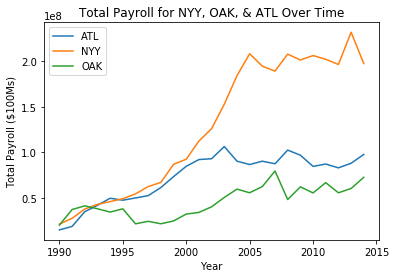

In [38]:
ax = final_teams_payroll.plot()

plt.title("Total Payroll for NYY, OAK, & ATL Over Time")
plt.xlabel("Year")
plt.ylabel("Total Payroll ($100Ms)")

ax.legend(loc='upper left')

plt.show()

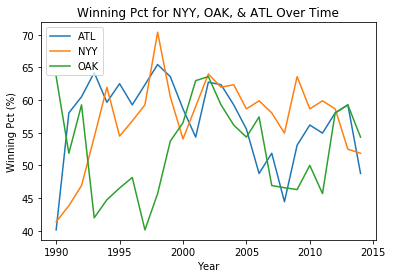

In [39]:
ax = final_teams_winning_pct.plot()

plt.title("Winning Pct for NYY, OAK, & ATL Over Time")
plt.xlabel("Year")
plt.ylabel("Winning Pct (%)")

ax.legend(loc='upper left')

plt.show()

## Seaborn
Full Documentation: https://seaborn.pydata.org/

In [40]:
import seaborn as sns

### Seaborn Violin Plots
**Violin Plots**
Instead of a standard scatter plot, Violin plots create "violins" for every x-value in the dataset. A "violin" is essentially a vertical frequency distribution plot. Each "violin" plots the distribution of the y-value at each x-value. This will be more clear when we analyze our example below.

This is most useful when the x-value is categorical (ex: months, years, days, continents, countries, etc.)

**Let's use our clean NBA dataset from before.**

In [41]:
nba = pd.read_csv("./datasets/NBA Reg Season Player Avgs with Win Pct 2000-2019.csv")
nba

,Year,Player,Tm,start_pct,MP,PTS,TRB,AST,FGA,FG%,...,3P%,2PA,2P%,FTA,FT%,STL,BLK,TOV,PF,win_pct
0,2001,Shareef Abdur-Rahim,VAN,1.000000,40.0,20.5,9.1,3.1,15.8,0.472,...,0.188,15.0,0.487,6.6,0.834,1.1,1.0,2.9,2.9,0.280488
1,2001,Mike Bibby,VAN,1.000000,38.9,15.9,3.7,8.4,14.1,0.454,...,0.379,10.6,0.478,2.3,0.761,1.3,0.1,3.0,1.8,0.280488
2,2001,Michael Dickerson,VAN,0.985714,37.4,16.3,3.3,3.3,14.6,0.417,...,0.374,11.3,0.429,3.9,0.763,0.9,0.4,2.3,3.0,0.280488
3,2001,Othella Harrington,VAN,0.909091,28.8,10.9,6.6,0.8,8.8,0.466,...,0.000,8.7,0.470,3.5,0.779,0.4,0.6,2.4,3.1,0.280488
4,2001,Bryant Reeves,VAN,0.640000,24.4,8.3,6.0,1.1,7.4,0.460,...,0.250,7.3,0.462,1.9,0.796,0.6,0.7,1.2,3.2,0.280488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3505,2019,Reggie Bullock,DET,1.000000,30.8,12.1,2.8,2.5,10.0,0.413,...,0.388,3.3,0.463,1.5,0.875,0.5,0.1,1.2,1.8,0.500000
3506,2019,Andre Drummond,DET,1.000000,33.5,17.3,15.6,1.4,13.3,0.533,...,0.132,12.8,0.548,5.2,0.590,1.7,1.7,2.2,3.4,0.500000
3507,2019,Wayne Ellington,DET,0.928571,27.3,12.0,2.1,1.5,9.8,0.421,...,0.373,2.0,0.607,1.2,0.758,1.1,0.1,0.9,1.9,0.500000
3508,2019,Blake Griffin,DET,1.000000,35.0,24.5,7.5,5.4,17.9,0.462,...,0.362,10.9,0.525,7.3,0.753,0.7,0.4,3.4,2.7,0.500000


**NBA 3-Pointers Attempted 2000-2019 Violin Plot:**

Text(0, 0.5, '3-Pointers Attempted Per Game')

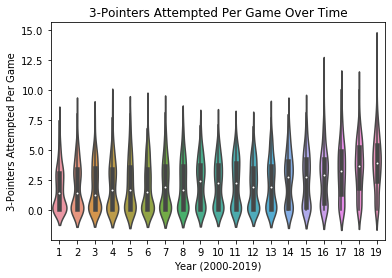

In [42]:
####################### IGNORE CODE BELOW, IT'S JUST FOR AESTHETIC ####################################
# Create a new column `Year_Short` to be used when plotting so that the plot is cleaner
# Basically just the `Year` column with only the last 2 digits.
nba['Year Short'] = nba['Year']
def apply_yr_short(x):
    # Just use last 2 digits
    return x%100
nba['Year Short'] = nba['Year Short'].apply(apply_yr_short)
####################### IGNORE CODE ABOVE, IT'S JUST FOR AESTHETIC ####################################

## IMPORTANT Seaborn code here ##
sns.violinplot(x='Year Short',y='3PA', data=nba)
plt.title("3-Pointers Attempted Per Game Over Time")
plt.xlabel("Year (2000-2019)")
plt.ylabel("3-Pointers Attempted Per Game")

**Let's Switch to the Gapminder Global Population Dataset:**

In [43]:
gapminder = pd.read_csv("./datasets/08_gap-every-five-years.tsv.txt", sep='\t')
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


**Life Expectancy vs Time Violin Plot**

Text(0.5, 1.0, 'Life Expectancy Over Time')

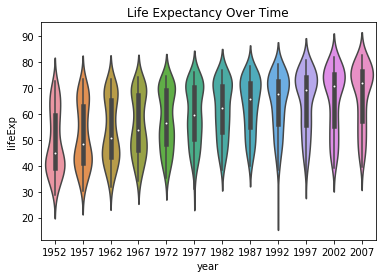

In [44]:
sns.violinplot(x='year', y='lifeExp', data=gapminder)
plt.title("Life Expectancy Over Time")

**Let's visualize the data with continent as our x-value...**

In [45]:
gapminder["year"].unique

<bound method Series.unique of 0       1952
1       1957
2       1962
3       1967
4       1972
        ... 
1699    1987
1700    1992
1701    1997
1702    2002
1703    2007
Name: year, Length: 1704, dtype: int64>

**Life Expectancy by Continent in 1987 (Old Times)**

,country,continent,year,lifeExp,pop,gdpPercap
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
19,Albania,Europe,1987,72.000,3075321,3738.932735
31,Algeria,Africa,1987,65.799,23254956,5681.358539
43,Angola,Africa,1987,39.906,7874230,2430.208311
55,Argentina,Americas,1987,70.774,31620918,9139.671389
...,...,...,...,...,...,...
1651,Vietnam,Asia,1987,62.820,62826491,820.799445
1663,West Bank and Gaza,Asia,1987,67.046,1691210,5107.197384
1675,"Yemen, Rep.",Asia,1987,52.922,11219340,1971.741538
1687,Zambia,Africa,1987,50.821,7272406,1213.315116


Text(0.5, 1.0, 'Life Expectancy By Continent in 1987')

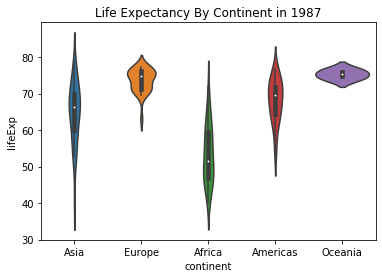

In [46]:
gapminder_1987=gapminder[gapminder["year"] == 1987]
display(gapminder_1987)
sns.violinplot(x='continent', y='lifeExp', data=gapminder_1987)
plt.title("Life Expectancy By Continent in 1987")

**Life Expectancy by Continent in 2007 (Modern Times)**

,country,continent,year,lifeExp,pop,gdpPercap
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640
...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906
1691,Zambia,Africa,2007,42.384,11746035,1271.211593


Text(0.5, 1.0, 'Life Expectancy By Continent in 2007')

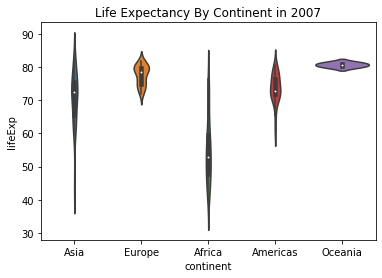

In [47]:
gapminder_2007=gapminder[gapminder["year"] == 2007]
display(gapminder_2007)
sns.violinplot(x='continent', y='lifeExp', data=gapminder_2007)
plt.title("Life Expectancy By Continent in 2007")